# Project Title: Data Science Job EDA & Visualization.

## Intro:
    Salaries of jobs in the Data Science domain
    📌 GOAL:
        1. Analyze the dataset and figure out useful insights fromthe data.
        2. Understand the purpose and effectiveness of the visualization methods used primarily. Use only the 
            default libraries, matplotlib and seaborn.
        3. Understand each variable in the Salary data.
        4. Edit and blend basic visualization methods to gain a refined design and a lot of information.
    
## Variables:
	• work_year --> The year the salary was paid.
	• experience_level --> The experience level in the job during the year with the following possible 
        values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
	• employment_type --> The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
	• job_title --> The role worked in during the year.
	• salary --> The total gross salary amount paid.
	• salary_currency --> The currency of the salary paid as an ISO 4217 currency code.
	• Salaryinusd --> The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
	• employee_residence --> Employee's primary country of residence in during the work year as an ISO 3166 country code.
	• remote_ratio --> The overall amount of work done remotely, possible values are as follows: 0 No remote 
        work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
	• company_location --> The country of the employer's main office or contracting branch as an ISO 3166 country code.
    • company_size --> The average number of people that worked for the company during the year: S less than 
        50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [503]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import country_converter as coco
%matplotlib inline

In [504]:
df=pd.read_csv('ds_salaries.csv')
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [505]:
df.shape

(607, 11)

In [506]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


* .T is appended over here for transposing the matrix

In [508]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


* By df.info() we know that there is no null value in the dataset but i have pplotted out this heatmap just for practice :)

Text(0.5, 1.0, 'Checking for null values')

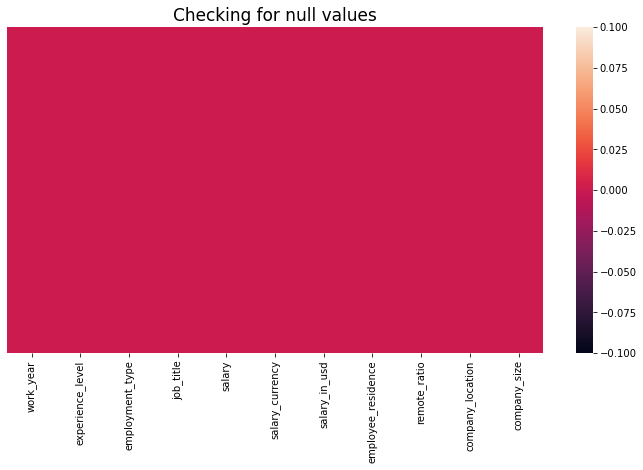

In [509]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),yticklabels=False)
plt.title('Checking for null values',size=17)

* By this countplot we can make out that there are majrity of full time jobs in Data Science according to the dataset.

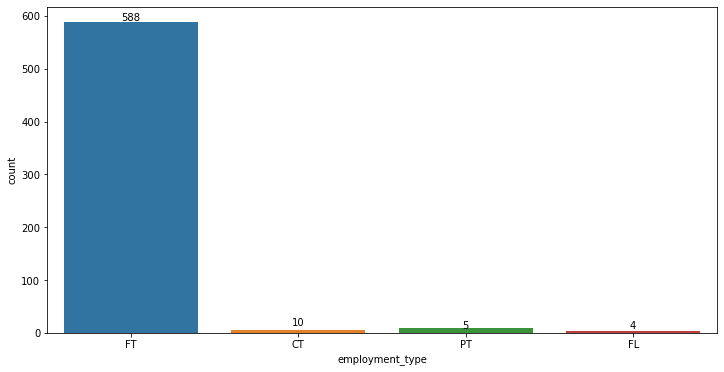

In [510]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='employment_type')
for i in range(len(data)):
        plt.text(i,data[i],data[i],ha='center',va='bottom')

* By this countplot we can say that there are majority of medium sized company in the field of data science, runner up is the large sized companies and lastly comes the small sized.

<AxesSubplot:xlabel='company_size', ylabel='count'>

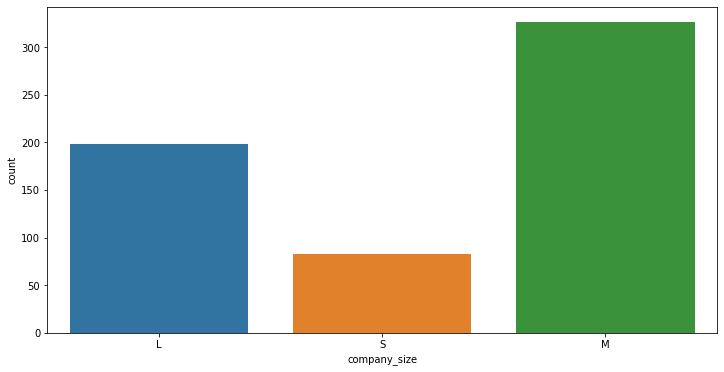

In [511]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='company_size')     

In [512]:
company_arr=df['company_size'].unique()
ds_salary_mean=[]
for x in df['company_size'].unique():
    ds_salary_mean.append(round(df[(df['job_title']=='Data Scientist') & (df['company_size']==x)]['salary_in_usd'].mean(),2))
print(company_arr)
print(ds_salary_mean)

['L' 'S' 'M']
[103313.36, 51925.76, 126380.75]


* Getting an idea of the correlation of different features.

<AxesSubplot:>

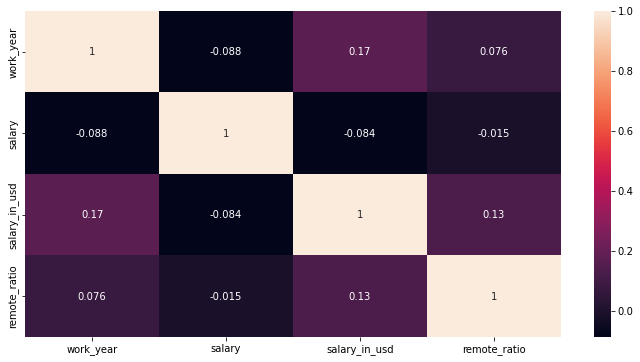

In [513]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df.corr(),annot=True)

* Calculated the X and y arrays in the above cell and plotted as a bar chart, this chart shows the average salary of data scientist according to company size

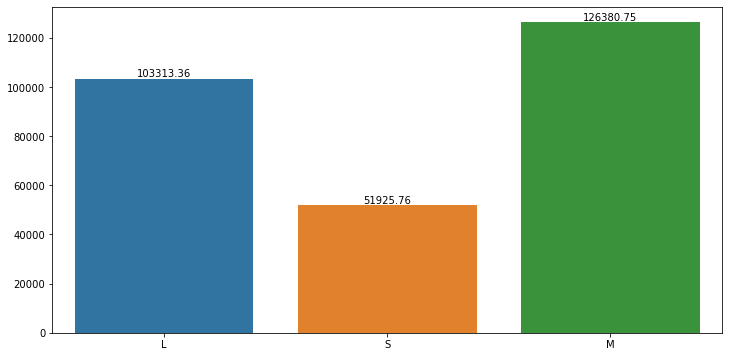

In [514]:
plt.figure(figsize=(12,6))
sns.barplot(x=company_arr,y=ds_salary_mean)
for i in range(len(company_arr)):
        plt.text(i,ds_salary_mean[i],ds_salary_mean[i],ha='center',va='bottom')

* This pie chart shows how many percentage of individuals live where the company is situated and how many are away ;) 

([<matplotlib.patches.Wedge at 0x1b7c783c250>,
 [Text(-1.0619019707610353, 0.2869916453380293, 'lives in country'),
  Text(1.0619019573259858, -0.28699169504924754, 'lives away')],
 [Text(-0.5792192567787465, 0.15654089745710686, '91.6%$'),
  Text(0.5792192494505377, -0.1565409245723168, '8.4%$')])

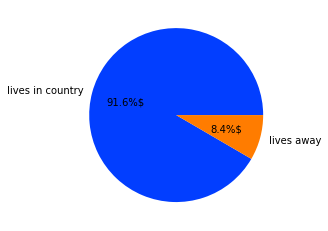

In [515]:
total_perc=len(df[df['employee_residence']==df['company_location']])/len(df)*100
perc_df=[total_perc,(100-total_perc)]
labels=['lives in country','lives away']
plt.pie(perc_df, labels = labels, colors = sns.color_palette('bright'), autopct='%1.1f%%$')

* Before plttling a world map convert the country codes to ISO3 acceptable format!

In [516]:
converted_country = coco.convert(names=df['company_location'], to="ISO3")

In [517]:
df['company_location'] = converted_country
average = df.groupby('company_location').mean().reset_index()
# print(average)

fig = px.choropleth(locations=average['company_location'],
                    color=average['salary_in_usd'],
                    color_continuous_scale=px.colors.sequential.solar,
                    title = 'Average Salary by Company Location')
fig.show()

* What is the average remote ratio in countries. Plotting using plotly.express choropleth...

In [518]:
average = df.groupby('company_location').mean().reset_index()
fig = px.choropleth(locations=average['company_location'],
                    color=average['remote_ratio'],
                    color_continuous_scale=px.colors.sequential.solar,
                    title = 'Remote Ratio by Company Location')
fig.show()

In [519]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

* This line chart shows the growth of data scientist job YoY ;)

In [520]:
growth=df.query("job_title=='Data Scientist'").groupby('work_year').size().reset_index()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

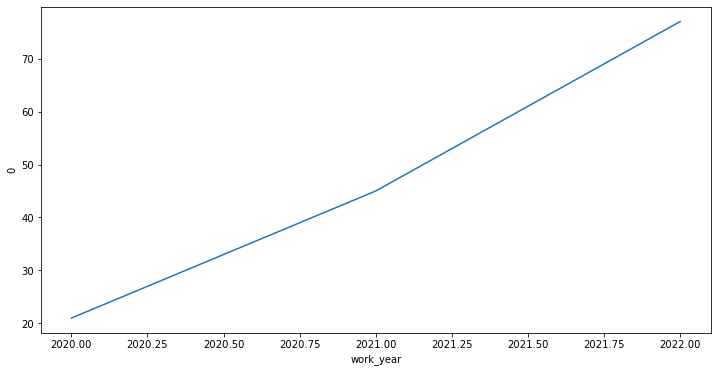

In [521]:
plt.figure(figsize=(12,6))
sns.lineplot(data=growth,x='work_year',y=0)
plt.tight_layout

* By using the Purchasing Power Parity by world bank.
* PPP factor of India is 0.29 in term of $US. Monetary value of US$ 1=INR 80.
* In terms of PPP US$ 1=80*0.29=23.2. We will calculate this PPP and plot it to visualize it. 

* Here we are importing the data downloaded from web about the PPP and preparing it for merging with the main dataset...

In [552]:
df_ppp=pd.read_csv('PPP_vals.csv')
df_ppp.drop(['MEASURE','TIME'],axis=1,inplace=True)
df_ppp.rename(columns = {'LOCATION':'company_location'}, inplace = True)
df_ppp.head()

,company_location,Value
0,AUS,1.438979
1,CAN,1.253066
2,FRA,0.725323
3,DEU,0.741488
4,ITA,0.654354


In [561]:
df_merged = pd.merge(df, df_ppp, how='inner', on = 'company_location')
df_merged.rename(columns = {'Value':'PPP_ratio'}, inplace = True)
df_merged[df_merged['company_location']=='IND']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,PPP_ratio
451,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IND,L,23.138138
452,2020,EN,FT,Data Science Consultant,423000,INR,5707,IN,50,IND,M,23.138138
453,2020,MI,FT,Product Data Analyst,450000,INR,6072,IN,100,IND,L,23.138138
454,2020,EN,FT,Data Analyst,450000,INR,6072,IN,0,IND,S,23.138138
455,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IND,M,23.138138
456,2021,MI,FT,Lead Data Analyst,1450000,INR,19609,IN,100,IND,L,23.138138
457,2021,EN,FT,Data Scientist,2200000,INR,29751,IN,50,IND,L,23.138138
458,2021,EN,FT,Data Engineer,2250000,INR,30428,IN,100,IND,L,23.138138
459,2021,MI,FT,Data Scientist,700000,INR,9466,IN,0,IND,S,23.138138
460,2021,EN,FT,Machine Learning Engineer,20000,USD,20000,IN,100,IND,S,23.138138
